In [1]:
import os
import sys
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from andi_datasets.models_phenom import models_phenom
from andi_datasets.datasets_phenom import datasets_phenom
from andi_datasets.utils_trajectories import plot_trajs
from andi_datasets.utils_challenge import label_continuous_to_list

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

/home/junwoo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
L = 1.5*128  # boundary box size
N = 10  # number of trajectory
T = 200  # length of trajectory

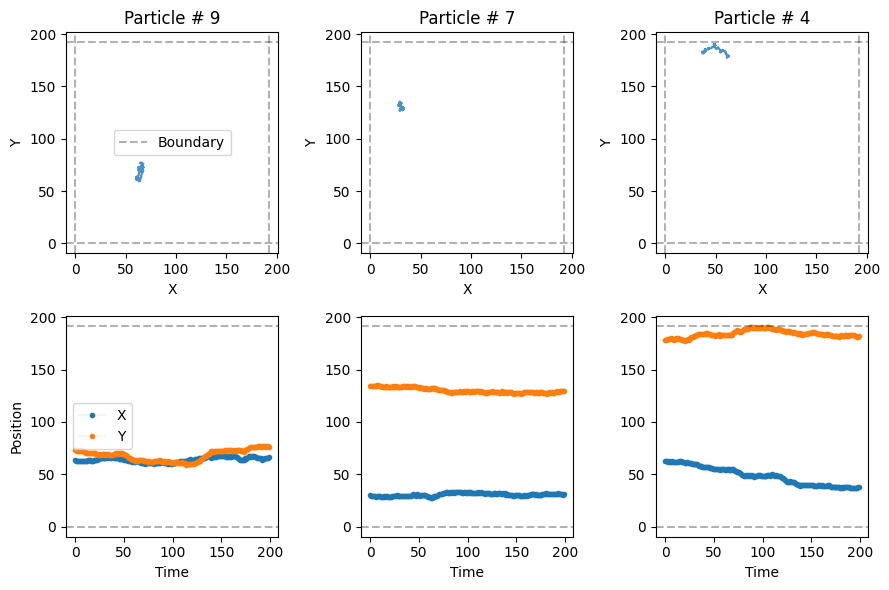

In [3]:
trajs_model, labels_model = models_phenom().multi_state(N=N,
                                                        L=L,
                                                        T=T,
                                                        alphas=[0.5, 1.5],  # Fixed alpha for each state
                                                        Ds=[[0.1, 0.0], [0.1, 0.0]],# Mean and variance of each state
                                                        M=[[0.95, 0.05], [0.05, 0.95]]  # Transition matrix
                                                       )
plot_trajs(trajs_model, L, N, num_to_plot =3)

In [4]:
print(trajs_model.shape)  # length of trajectory, number of trajectory, xy positions
print(labels_model.shape)  # length of trajectory, number of trajectory, labels:[alphas, diffusion_coefficient, state_nums]

(200, 10, 2)
(200, 10, 3)


In [5]:
def write_trajectory(trajs_models, filename: str):
    try:
        with open(filename, 'w', encoding="utf-8") as f:
            input = 'traj_idx,frame,x,y\n'
            for index in range(trajs_models.shape[1]):
                xs = trajs_model[:, index, 0]
                ys = trajs_model[:, index, 1]
                for xpos, ypos, frame in zip(xs, ys, range(xs.shape[0])):
                    input += f'{index},{frame},{xpos},{ypos}\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error, check the file: {filename}")
        print(e)

In [6]:
def write_andi2_label(model_labels, filename: str):
    try:
        with open(filename, 'w', encoding="utf-8") as f:
            input = f''
            for traj_idx in range(model_labels.shape[1]):
                input += f'{traj_idx},'
                changepoints, alphas, Ds, state_nums = label_continuous_to_list(model_labels[:, traj_idx, :])
                for cp, alpha, D, state_num in zip(changepoints, alphas, Ds, state_nums):
                    input += f'{D},{alpha},{state_num},{cp},'
                input += f'\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error: {e}")
        

In [7]:
write_trajectory(trajs_model, './sample.csv')
write_andi2_label(labels_model, './sample.txt')